# Importing the Necessary Libraries

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Fetching the MNIST data from sklearn library

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
# Extracting the variables/attributes and the target class values from the data

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

# Data Pre-Processing Step

In [ ]:
# PCA is affected by scales so we need to scale the features.
# Also for t-SNE since the distributions are distance based, all the data must be numeric. 
# If need be we should convert categorical variables to numeric ones by binary encoding or a similar method. 
# So it is quite useful to normalize the data, such that each variable is on the same scale. 
# This avoids variables with a larger numeric range dominating the analysis.
# Normalizing images so that the range is in [0, 1].

X = normalize(X, norm = 'max')

##Principal Component Analysis

In [ ]:
# Let's observe the initial dimension for the data
X.shape

(70000, 784)

**We want to project the data into two dimensions.**<br> 
*   PCA basically looks for those direction of projection where the variance of the data is maximum after the projection, this simply means we don't want any loss of information, we would like to reduce the number of more than one data points mapping to the same point in the lower dimension and also we want to find those lines that capture most information in the data.

*   Thus if the higher and the lower dimension have different values then PCA may not not be the lossless method of dimensionality reduction.

*   Here, first the PCA constructor has been instantiated with the n_components paramater as 2 to reduce the data dimensionality denoted by X here from having 784 dimensions to 2 dimensions. To achieve this, the fit_transform() method has been called using the pca object on X in order to apply the dimensionality reduction on X.

In [ ]:
# Initializing the PCA Constructor

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
# Let's observe the reduced dimensions for the data
X_pca.shape

(70000, 2)

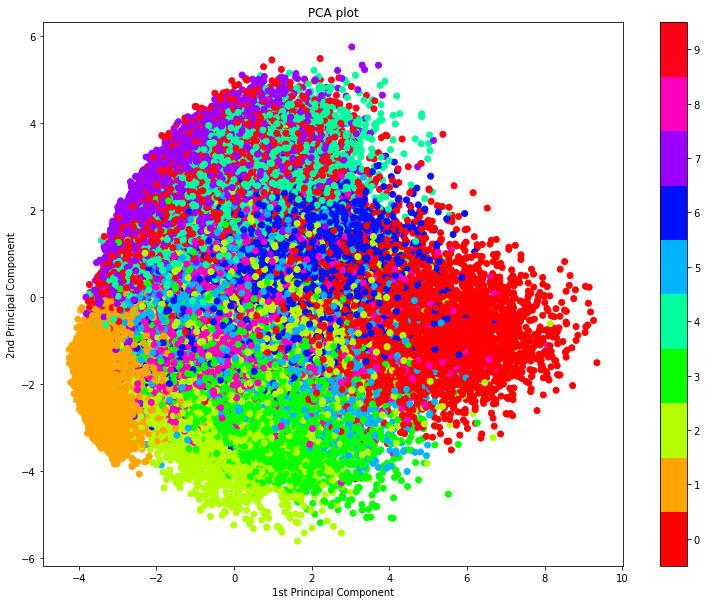

In [ ]:
#figure
fig, ax1 = plt.subplots()
fig.set_size_inches(13, 10)

#labels
ax1.set_xlabel('1st Principal Component')
ax1.set_ylabel('2nd Principal Component')
ax1.set_title('PCA plot')

#c sequence
c = y

#plot
plot = plt.scatter( X_pca[:,0], X_pca[:,1], c=c, cmap = 'hsv')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.show()

*    We can clearly see that PCA is not able to do well on this dataset.There is huge overlap among the given number of classes thereby not giving us the lossless dimensionality reduction.

##t-SNE
###Student t - Stochastic Neighbourhood Embedding

In [ ]:
# The initial data remains the same for the t-SNE as well
X_embedded = TSNE(n_components=2).fit_transform(X)

*  Like PCA t-SNE can also be used for data visualization of high dimension by dimensionality reduction. 
*  The main idea behind t-SNE is that it uses standard normal distribution for determining the similarity of a point to all the other points by assigning the point to be the mean of the distribution.
*  It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.
*  We use t-distribution in the lower dimension to avoid the crowding problem and hence t-SNE can separate the data points really well unlike PCA as we have seen above.
<br>*Here again the n_components parameter has been set to be 2 for the TSNE constructor because we would like to reduce the input dimension of 784 to 2 dimensions. Finally the fit_transform method has been called using TSNE object in order to fit X into an embedded space and return that transformed output. t-SNE also uses the perplexity parameter that basically means the number of nearest neighbors considered when matching the original and fitted distributions for each point.Here the perplexity parameter has left to be the default value itself which is 30.0*

In [ ]:
# Let's observe the reduced dimension
X_embedded.shape

(70000, 2)

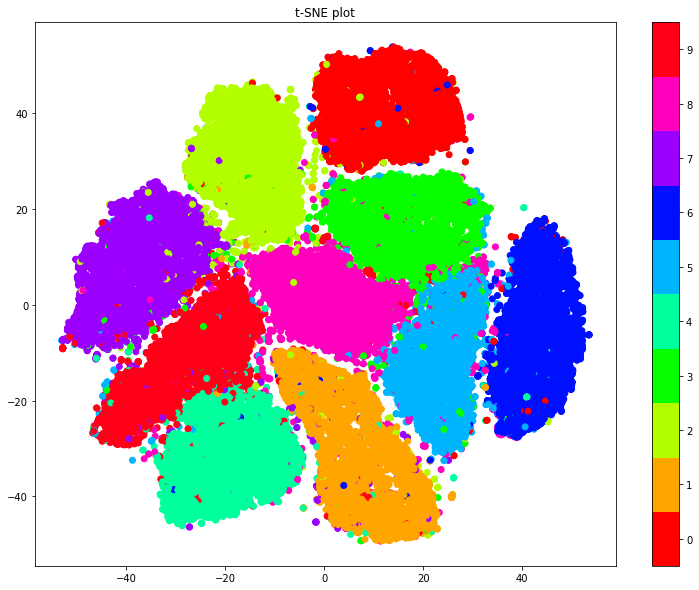

In [ ]:
#figure
fig, ax1 = plt.subplots()
fig.set_size_inches(13, 10)

#labels
ax1.set_title('t-SNE plot')

#c sequence
c = y

#plot
plot = plt.scatter(X_embedded[:,0], X_embedded[:,1], c=c, cmap = 'hsv')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.show()

**Clearly we can see how well t-SNE has performed than compared to PCA. The data points seems to have got well separated with very less overlap among them, thereby giving us a lossless dimensionality reduction. Basically t-SNE has avoided the crowding problem that PCA had suffered from and has given us a better visualizaton by better separation among the classes.**